In [29]:
from pathlib import Path
import matplotlib.pyplot as plt
import pandas as pd
import os

In [35]:
log_path = Path("/home/kafka/repos/thesis/logs_bpf/")

In [149]:
single_bpf_read_path = log_path / "bpf_traces" / "trace_read_single.out"
shared_bpf_read_path = log_path / "bpf_traces" / "trace_read_shared.out"

df_single = pd.read_csv(single_bpf_read_path, delim_whitespace=True, skiprows=[0,1], names=['timestamp', 'pid', 'fd', 'ret (B)', 'lat', 'filename'])
df_shared = pd.read_csv(shared_bpf_read_path, delim_whitespace=True, skiprows=[0,1], names=['timestamp', 'pid', 'fd', 'ret (B)', 'lat', 'filename'])

In [209]:
single_bpf_read_path = log_path / "bpf_traces" / "trace_read_single.out"
shared_bpf_read_path = log_path / "bpf_traces" / "trace_read_shared.out"

df_single = pd.read_csv(single_bpf_read_path, delim_whitespace=True, skiprows=[0,1], names=['timestamp', 'pid', 'fd', 'ret (B)', 'lat', 'filename'])
df_shared = pd.read_csv(shared_bpf_read_path, delim_whitespace=True, skiprows=[0,1], names=['timestamp', 'pid', 'fd', 'ret (B)', 'lat', 'filename'])


In [235]:
#fig, (ax1) = plt.subplots(1, 1, sharex=True)
#axs = [ax1]
proc_ids = ["PID 14413", "PID 14426"]

df_single['running_seconds'] = pd.to_datetime(df_single['timestamp'], unit='ns')

# Calculate the difference between each timestamp and the timestamp of the first row in seconds
first_timestamp = df_single['running_seconds'].iloc[0]
df_single['running_seconds'] = (df_single['running_seconds'] - first_timestamp).dt.total_seconds()

# Group the rows by the FILENAME column and select the last distinct row for each group
#df_single = df_single.groupby('filename').last().reset_index()

# Sum the RET column for each group
#df_single['ret (B)'] = df_single.groupby('filename')['ret (B)'].transform('sum')

jpg_df = df_single[df_single['filename'].str.endswith('.jpg', na=False)]

df_single_14413 = jpg_df[jpg_df.pid == 14413]
df_single_14426 = jpg_df[jpg_df.pid == 14426]

In [236]:
df_single_14413 = df_single_14413.groupby('filename').last().reset_index()
df_single_14426 = df_single_14426.groupby('filename').last().reset_index()

In [213]:
combined_df = pd.concat([df_single_14413["running_seconds"], df_single_14426["running_seconds"]], axis=1)
combined_df.columns = proc_ids

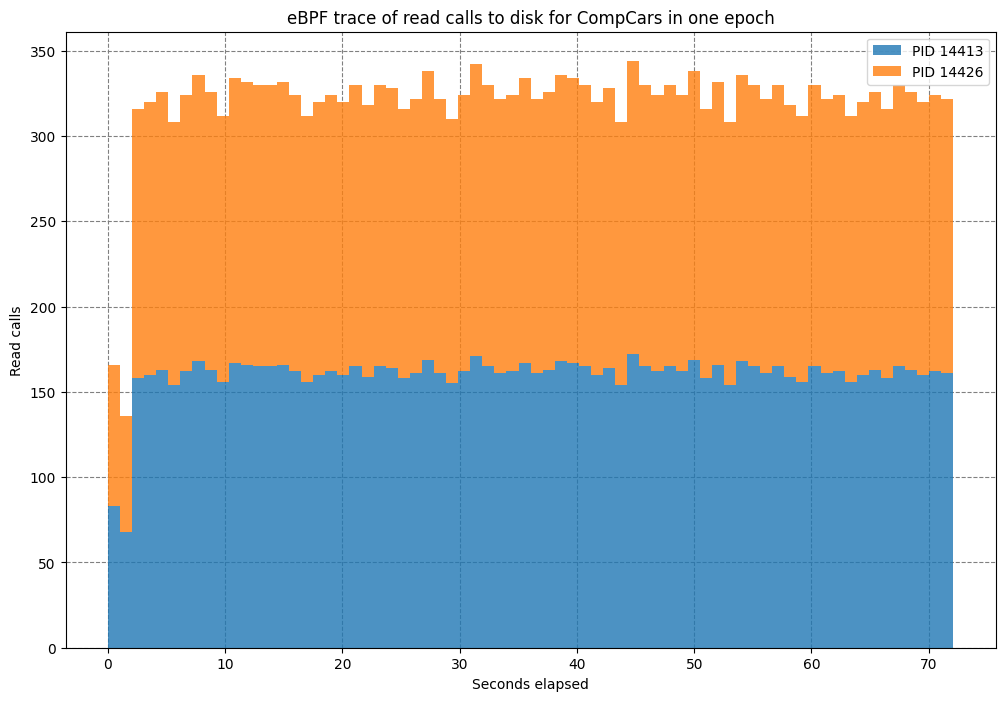

In [228]:
fig, ax = plt.subplots(figsize=(12,8))

combined_df.plot.hist(stacked=True, edgecolor=None, bins=70, ax=ax, alpha=0.8)
ax.set_axisbelow(True)
ax.grid(color='gray', linestyle='dashed')
plt.title("eBPF trace of read calls to disk for CompCars in one epoch")
plt.xlabel("Seconds elapsed")
plt.ylabel("Read calls")
plt.show()

In [230]:
#fig, (ax1) = plt.subplots(1, 1, sharex=True)
#axs = [ax1]
proc_ids = ["PID 14496"]

df_shared['running_seconds'] = pd.to_datetime(df_shared['timestamp'], unit='ns')

# Calculate the difference between each timestamp and the timestamp of the first row in seconds
first_timestamp = df_shared['running_seconds'].iloc[0]
df_shared['running_seconds'] = (df_shared['running_seconds'] - first_timestamp).dt.total_seconds()

jpg_df = df_shared[df_shared['filename'].str.endswith('.jpg', na=False)]

df_shared_14496 = jpg_df[jpg_df.pid == 14496]

In [231]:
df_shared_14496 = df_shared_14496.groupby('filename').last().reset_index()

combined_df = df_shared_14496["running_seconds"]

combined_df.columns = proc_ids

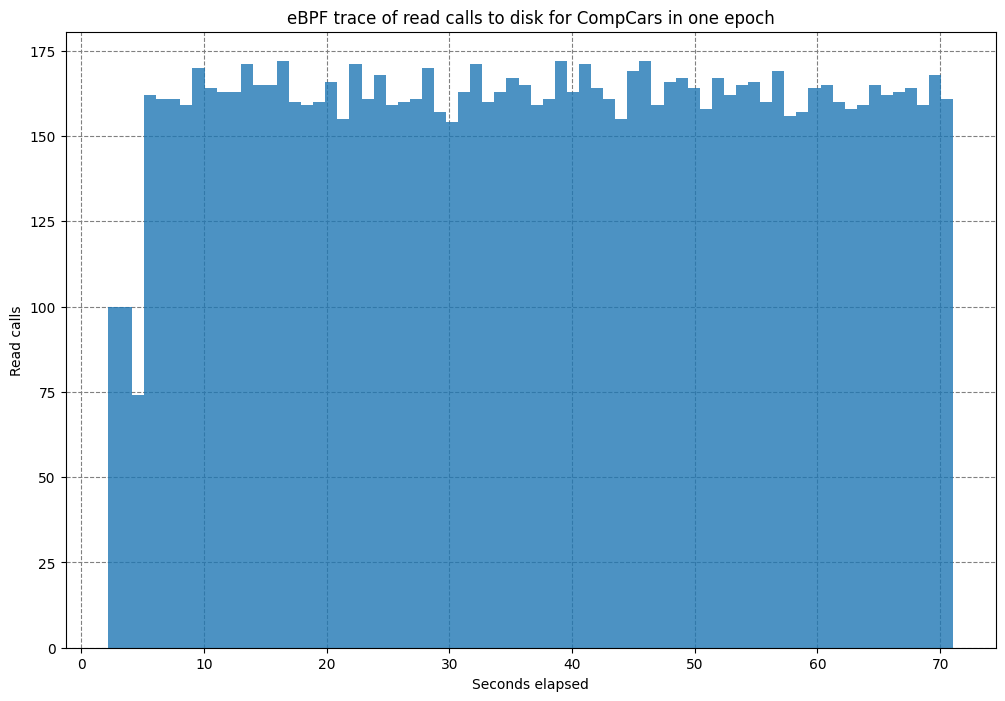

In [232]:
fig, ax = plt.subplots(figsize=(12,8))

combined_df.plot.hist(stacked=True, edgecolor=None, bins=70, ax=ax, alpha=0.8)
ax.set_axisbelow(True)
ax.grid(color='gray', linestyle='dashed')
plt.title("eBPF trace of read calls to disk for CompCars in one epoch")
plt.xlabel("Seconds elapsed")
plt.ylabel("Read calls")
plt.show()